In [4]:
import data_utils as data
import numpy as np
import ecg_utils as ecg
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
Holter = data.ecg_data('../data/sample_ecg.npz')

Signal not too long, not slicing
Execution time for grad_sqaure_conv: 0.013157129287719727 seconds
Execution time for threshold_calc: 0.0006771087646484375 seconds
Execution time for peak: 0.0011749267578125 seconds
Execution time for r_wave_detector: 0.015071868896484375 seconds
Execution time for threshold_calc: 0.00030803680419921875 seconds
Execution time for peak: 0.0013089179992675781 seconds
Execution time for p_wave_detector: 0.004490852355957031 seconds
Execution time for calculate_rr_int: 2.7179718017578125e-05 seconds
Signal not too long, not slicing
Execution time for grad_sqaure_conv: 0.010580062866210938 seconds
Execution time for threshold_calc: 0.0003910064697265625 seconds
Execution time for peak: 0.0008180141448974609 seconds
Execution time for r_wave_detector: 0.011813879013061523 seconds
Execution time for threshold_calc: 0.0003268718719482422 seconds
Execution time for peak: 0.0010449886322021484 seconds
Execution time for p_wave_detector: 0.0038259029388427734 sec

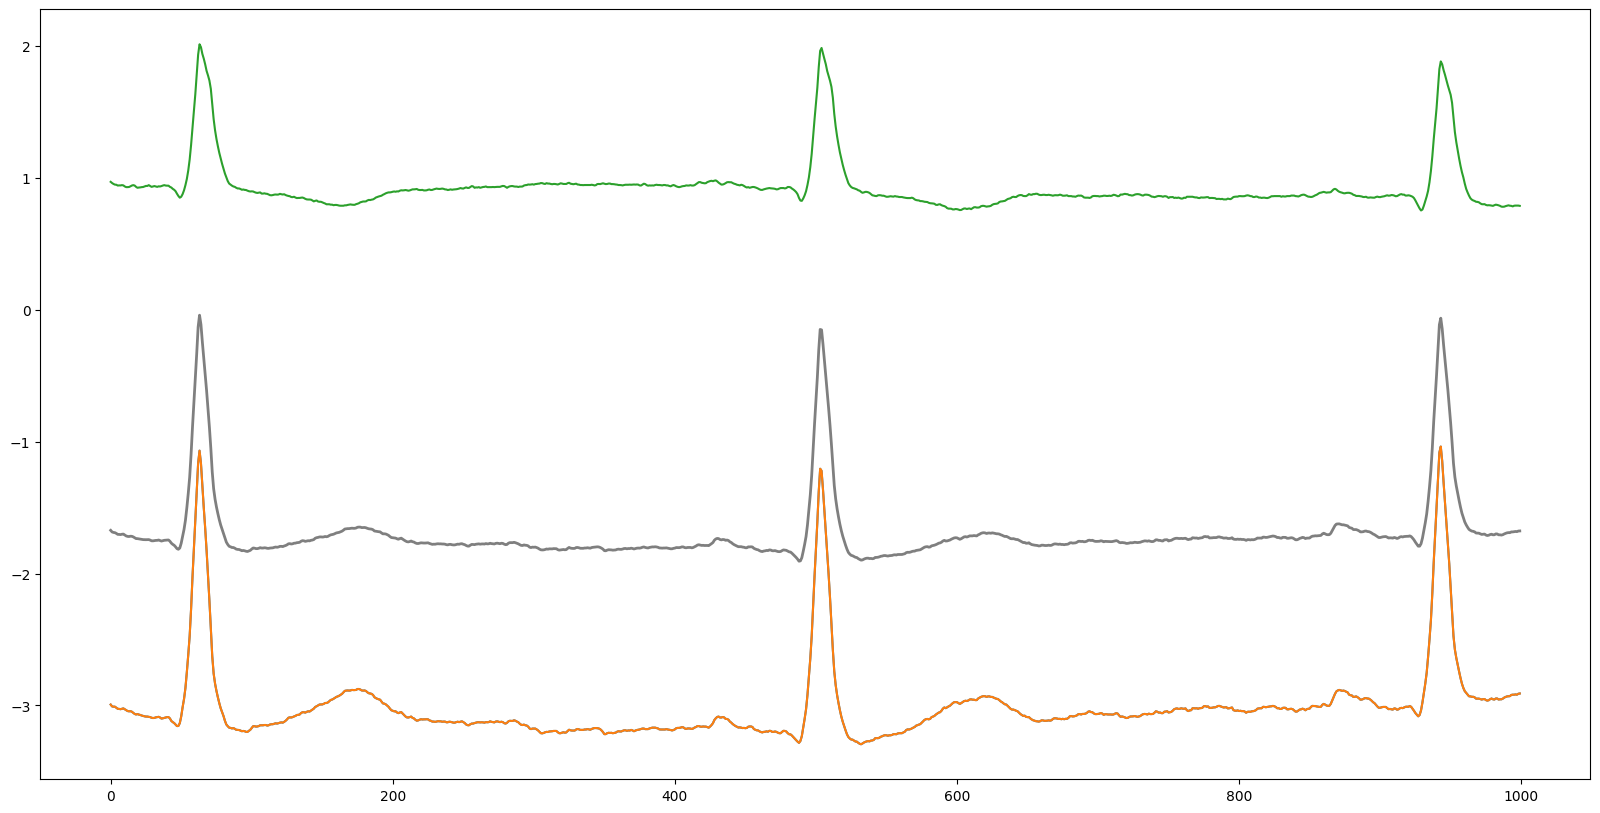

In [6]:
plt.figure(figsize=(20,10))
plt.plot(Holter.lead_2.signal[1000:2000])
plt.plot(Holter.lead_2.signal[1000:2000])
plt.plot(Holter.lead_3.signal[1000:2000])
plt.plot((Holter.lead_2.signal[1000:2000] + Holter.lead_2.signal[1000:2000] + Holter.lead_3.signal[1000:2000])/3, 'k', linewidth=2, alpha=0.5,label='Mean Signal')

In [7]:
signal_average = 1000*(Holter.lead_2.signal + Holter.lead_2.signal + Holter.lead_3.signal)/3

In [8]:
signal_average = data.ecg_lead(lead=4, signal=signal_average, fs=Holter.fs, U='mV')

Signal not too long, not slicing
Execution time for grad_sqaure_conv: 0.00991201400756836 seconds
Execution time for threshold_calc: 0.00042819976806640625 seconds
Execution time for peak: 0.0009140968322753906 seconds
Execution time for r_wave_detector: 0.011297941207885742 seconds
Execution time for threshold_calc: 0.00020694732666015625 seconds
Execution time for peak: 0.0007827281951904297 seconds
Execution time for p_wave_detector: 0.00322723388671875 seconds
Execution time for calculate_rr_int: 2.3126602172851562e-05 seconds


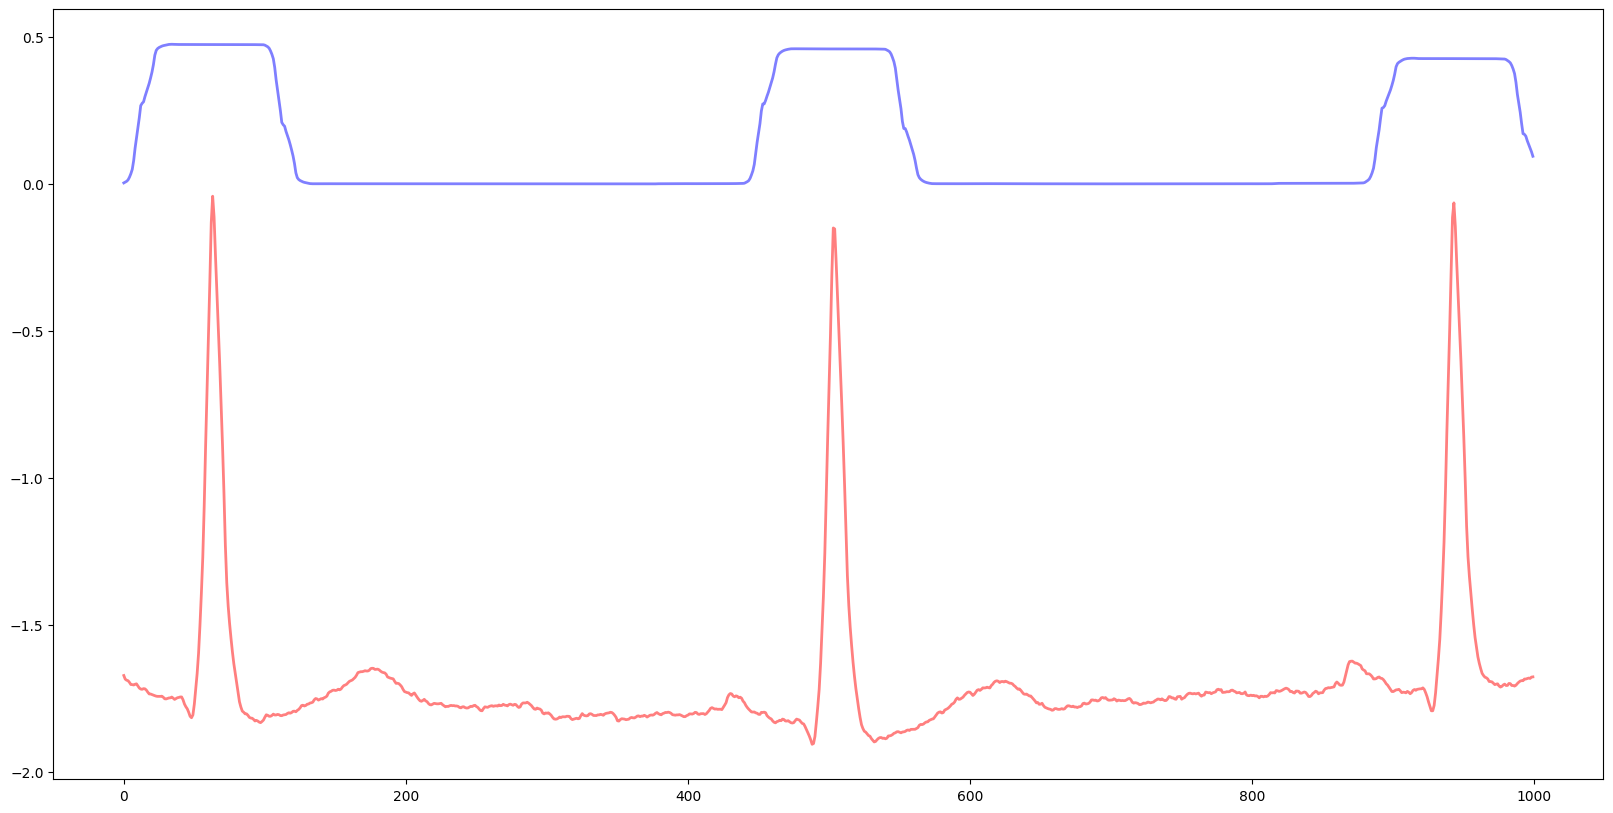

In [9]:
plt.figure(figsize=(20,10))
plt.plot(signal_average.signal[1000:2000], 'r', linewidth=2, alpha=0.5,label='Mean Signal')
plt.plot(signal_average.window[1000:2000], 'b', linewidth=2, alpha=0.5,label='Mean Signal')

<Axes: >

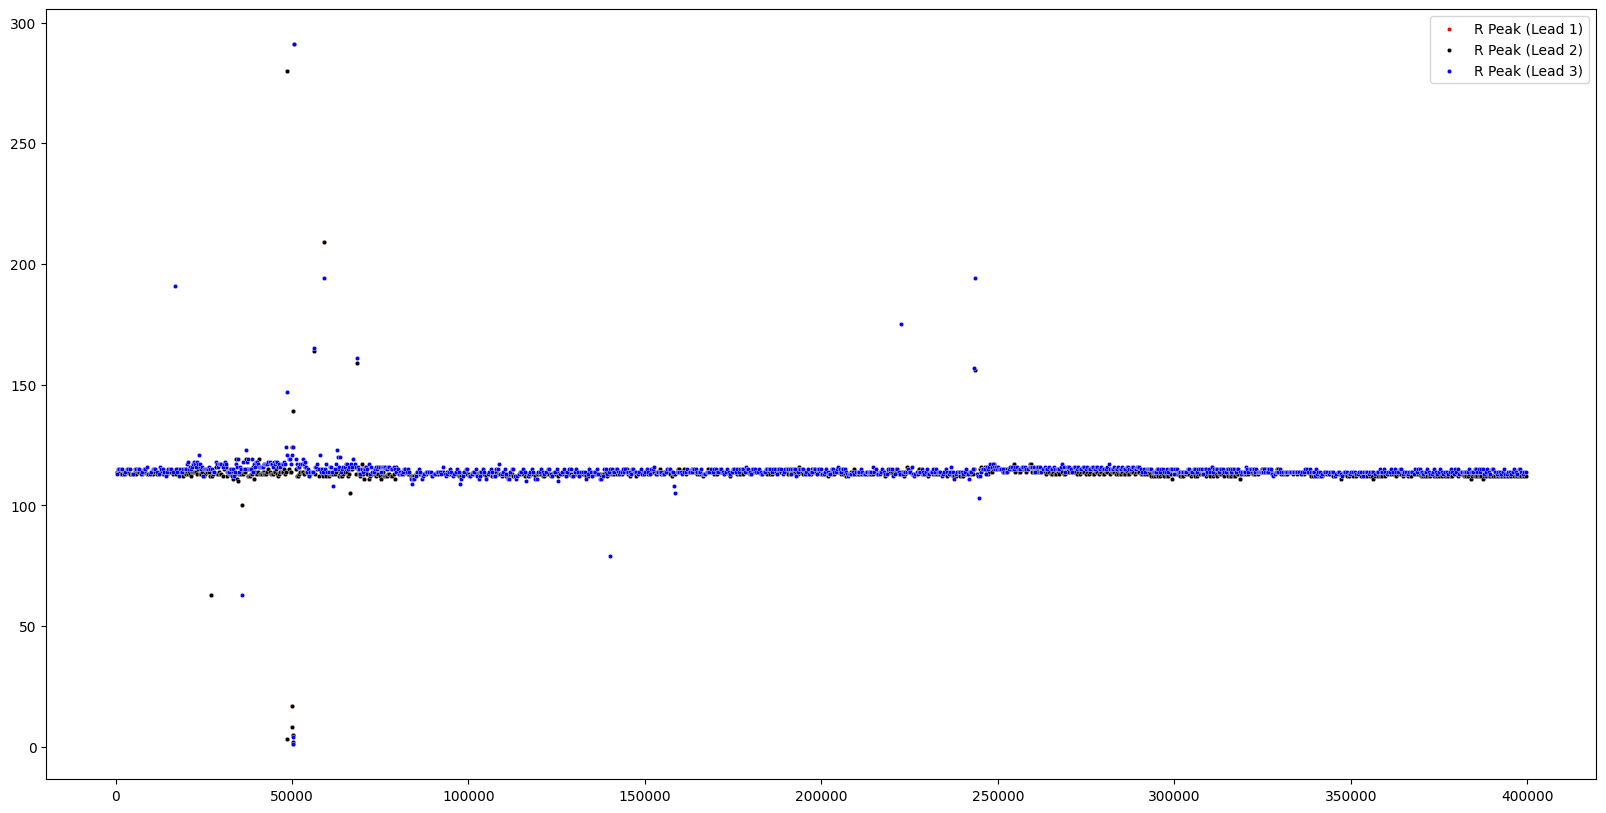

In [10]:
plt.figure(figsize=(20,10))
sns.scatterplot(x=Holter.lead_2.r_peaks[:,0], y=Holter.lead_2.r_peaks[:,1], s=10, c='r', marker='o', label='R Peak (Lead 1)')
sns.scatterplot(x=Holter.lead_2.r_peaks[:,0], y=Holter.lead_2.r_peaks[:,1], s=10, c='k', marker='o', label='R Peak (Lead 2)')
sns.scatterplot(x=Holter.lead_3.r_peaks[:,0], y=Holter.lead_3.r_peaks[:,1], s=10, c='b', marker='o', label='R Peak (Lead 3)')

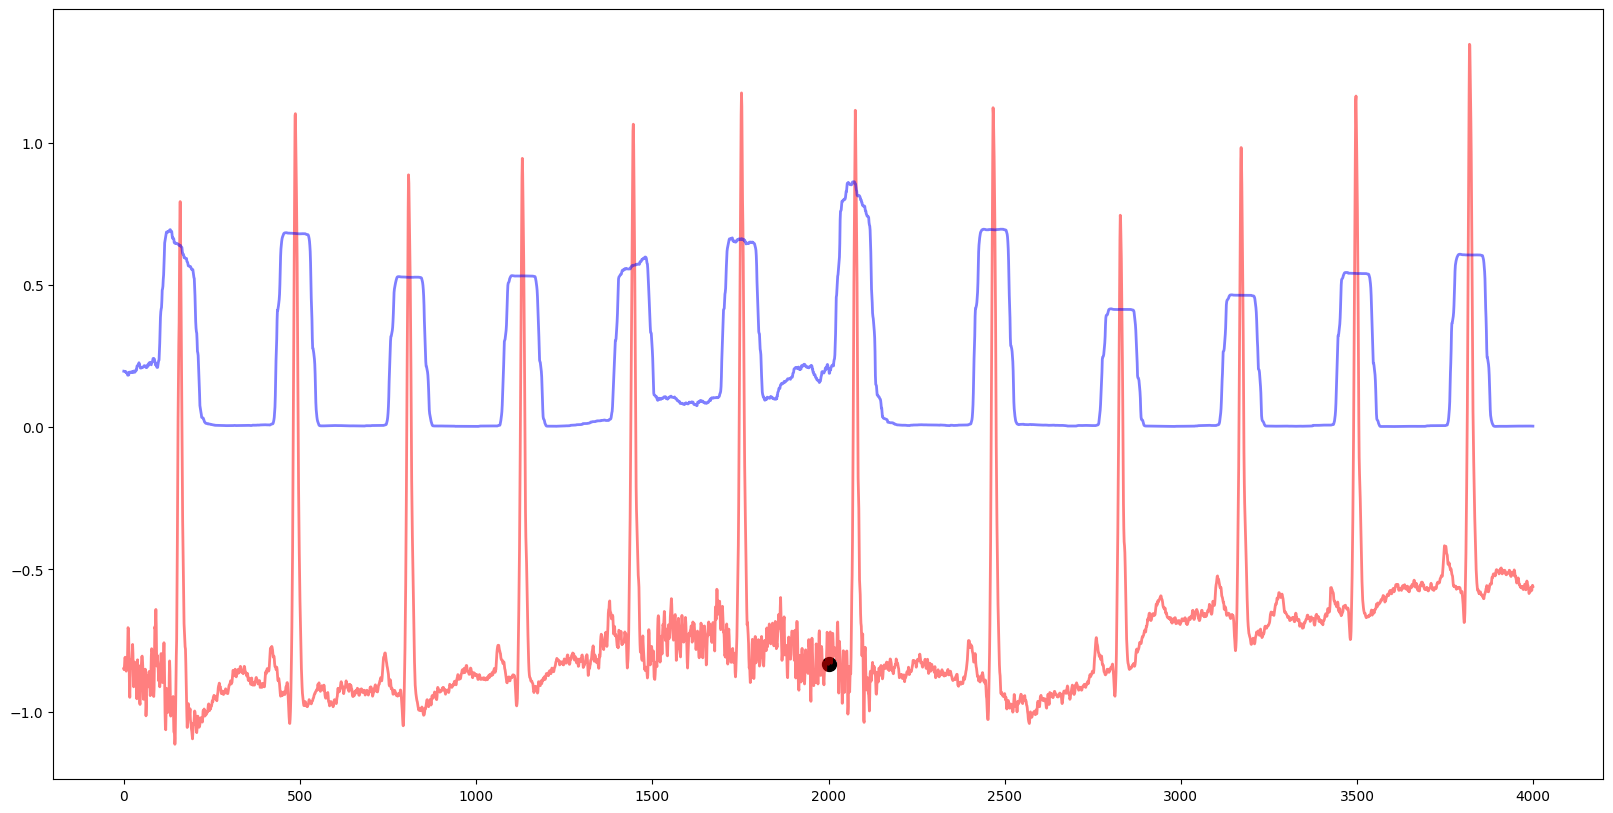

In [11]:
noise = Holter.lead_2.r_peaks[:,0][np.argmax(Holter.lead_2.r_peaks[:,1])]
t = noise
plt.figure(figsize=(20,10))
plt.plot(Holter.lead_2.signal[t-2000:t+2000], 'r', linewidth=2, alpha=0.5,label='Mean Signal')
plt.plot(Holter.lead_2.window[t-2000:t+2000], 'b', linewidth=2, alpha=0.5,label='Mean Signal')
plt.scatter(2000, Holter.lead_2.signal[t], s=100, c='k', marker='o', label='R Peak')

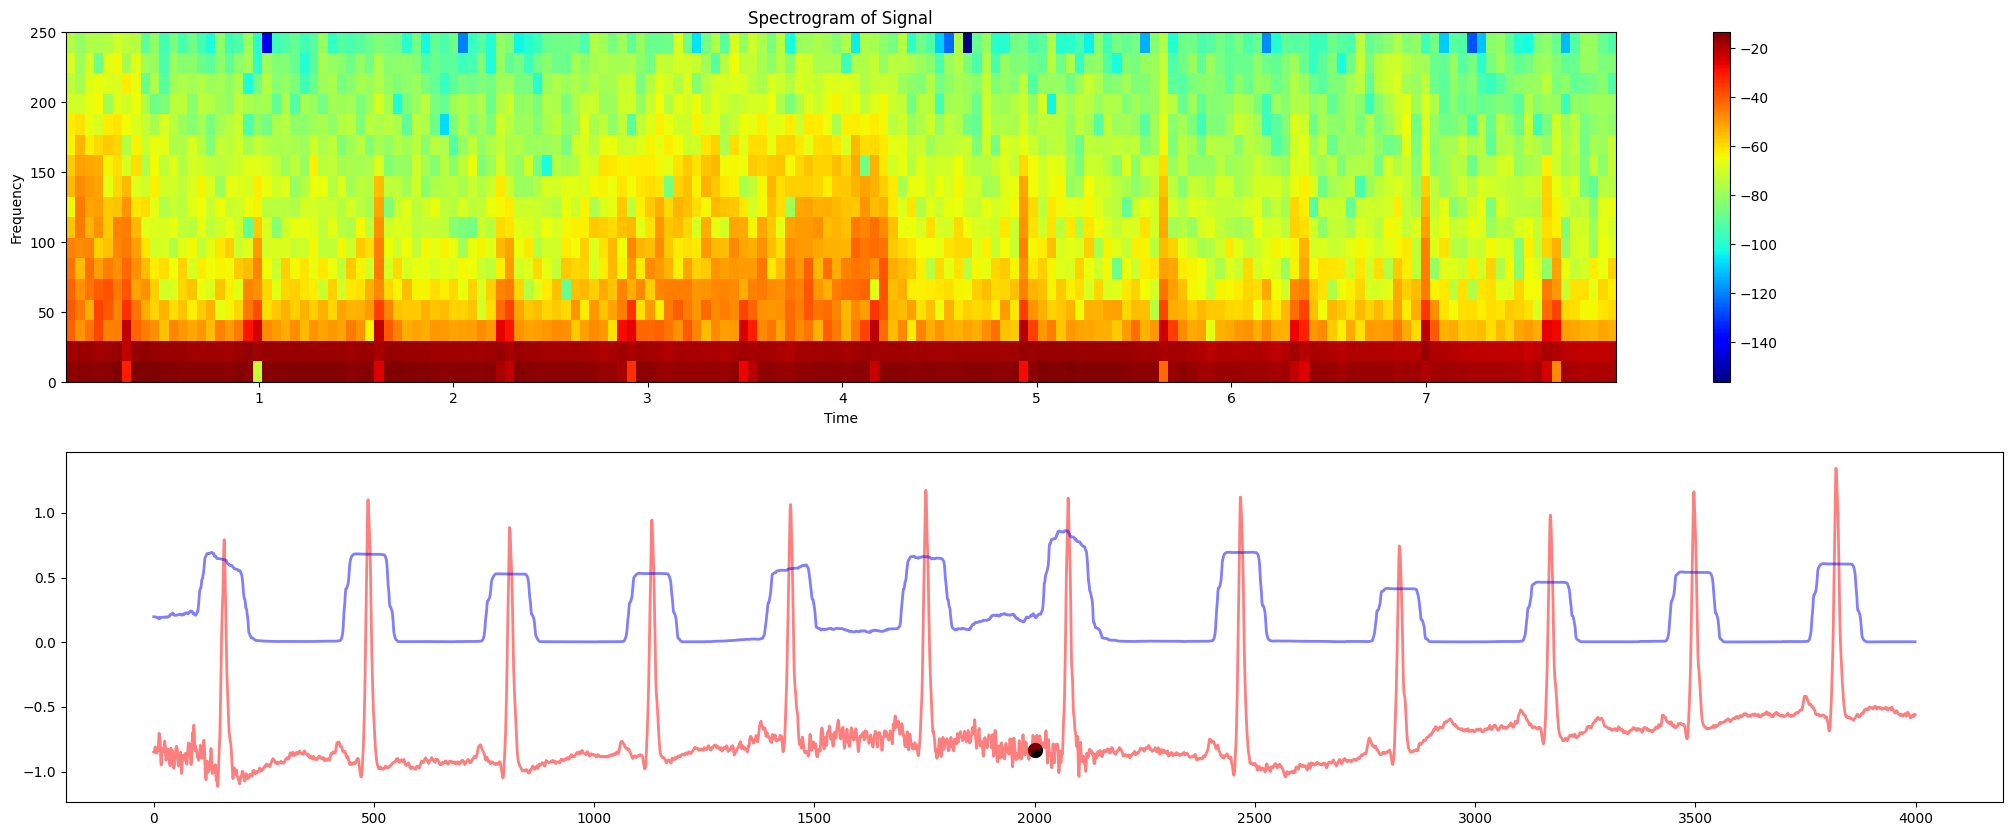

In [12]:
noise = Holter.lead_2.r_peaks[:,0][np.argmax(Holter.lead_2.r_peaks[:,1])]
t = noise
plt.figure(figsize=(25, 10))

# First subplot
plt.subplot(2, 1, 1)
plt.specgram(Holter.lead_2.signal[t-2000:t+2000], Fs=Holter.fs, NFFT=32, noverlap=8, cmap='jet')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.colorbar()
plt.title('Spectrogram of Signal')

plt.subplot(2, 1, 2)
plt.plot(Holter.lead_2.signal[t-2000:t+2000], 'r', linewidth=2, alpha=0.5,label='Mean Signal')
plt.plot(Holter.lead_2.window[t-2000:t+2000], 'b', linewidth=2, alpha=0.5,label='Mean Signal')
plt.scatter(2000, Holter.lead_2.signal[t], s=100, c='k', marker='o', label='R Peak')

plt.show()
